In [7]:
import tensorflow as tf

x_data = tf.constant([[1, 2],
                      [2, 3],
                      [3, 1],
                      [4, 3],
                      [5, 3],
                      [6, 2]], dtype=tf.float32)
y_data = tf.constant([[0],
                      [0],
                      [0],
                      [1],
                      [1],
                      [1]], dtype=tf.float32)

X = tf.Variable(0., shape=tf.TensorShape(None), dtype = tf.float32)
Y = tf.Variable(0., shape=tf.TensorShape(None), dtype = tf.float32)
W = tf.Variable(tf.random.normal([2, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# sigmoid function == tf.math.div(1. 1. + tf.math.exp(tf.linalg.matmul(X, W) + b))
def hypothesis():
    return tf.sigmoid(tf.linalg.matmul(X, W) + b)

# 밥그릇 형태를 위한 2가지 로그함수 짬뽕 (Y값이 1과 0을 표현해야하므로)
def cost(): 
    return -tf.reduce_mean(Y * tf.math.log(hypothesis()) + (1 - Y) * tf.math.log(1 - hypothesis()))

# 경사하강법
def train():
    return tf.keras.optimizers.SGD(learning_rate = 0.01).minimize(cost, var_list=[W, b])

# Hypothesis가 0.5 보다 크면 true, 외 false 처리하기 위해 float32로 캐스팅
def predicted():
    return tf.cast(hypothesis() > 0.5, dtype=tf.float32)

# 정확도 계산, 예측값과 실 Y값이 얼마나 같은지를 평균
def accuracy():
    return tf.reduce_mean(tf.cast(tf.equal(predicted(), Y), dtype=tf.float32))

X.assign(x_data)
Y.assign(y_data)
for step in range(10001):
    train()
    if step % 200 == 0:
        print(step, cost())

h, c, a = hypothesis(), cost(), accuracy()
print("Hypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 tf.Tensor(1.8380541, shape=(), dtype=float32)
200 tf.Tensor(0.46197116, shape=(), dtype=float32)
400 tf.Tensor(0.44029394, shape=(), dtype=float32)
600 tf.Tensor(0.4225897, shape=(), dtype=float32)
800 tf.Tensor(0.40708897, shape=(), dtype=float32)
1000 tf.Tensor(0.3930001, shape=(), dtype=float32)
1200 tf.Tensor(0.37992963, shape=(), dtype=float32)
1400 tf.Tensor(0.36766735, shape=(), dtype=float32)
1600 tf.Tensor(0.35609207, shape=(), dtype=float32)
1800 tf.Tensor(0.3451271, shape=(), dtype=float32)
2000 tf.Tensor(0.33471894, shape=(), dtype=float32)
2200 tf.Tensor(0.3248271, shape=(), dtype=float32)
2400 tf.Tensor(0.31541798, shape=(), dtype=float32)
2600 tf.Tensor(0.30646226, shape=(), dtype=float32)
2800 tf.Tensor(0.29793343, shape=(), dtype=float32)
3000 tf.Tensor(0.2898072, shape=(), dtype=float32)
3200 tf.Tensor(0.28206056, shape=(), dtype=float32)
3400 tf.Tensor(0.27467203, shape=(), dtype=float32)
3600 tf.Tensor(0.26762125, shape=(), dtype=float32)
3800 tf.Tensor(0.26088917

In [13]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=2))
# use sigmoid activation for 0~1 problem
tf.model.add(tf.keras.layers.Activation('sigmoid'))

''' 
better result with loss function == 'binary_crossentropy', try 'mse' for yourself
adding accuracy metric to get accuracy report during training
'''
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=50, steps_per_epoch=200)

# Accuracy report
print("Accuracy: ", history.history['accuracy'][-1])

# predict
print("Predict: ", tf.model.predict(x_data))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
 activation_8 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
200/200 [==============================] - 0s 648us/step - loss: 0.5256 - accuracy: 0.8350
Epoch 2/50
200/200 [==============================] - 0s 617us/step - loss: 0.4973 - accuracy: 0.8350
Epoch 3/50
200/200 [==============================] - 0s 602us/step - loss: 0.4810 - accuracy: 0.8350
Epoch 4/50
200/200 [==============================] - 0s 611us/step - loss: 0.4684 - accuracy: 0.8300
Epoch 5/50

In [15]:
import tensorflow as tf
import numpy as np

# 당뇨병 예측 데이터 1~8->팩터, 9->당뇨X: 0 당뇨Y: 1
dataset = tf.data.experimental.make_csv_dataset('resource/data-03-diabetes.csv', batch_size=100, num_epochs=1, shuffle=False, header=False, column_names=[1, 2, 3, 4, 5, 6, 7, 8, 9])

X = tf.Variable(1., dtype=tf.float32, shape=tf.TensorShape(None))
Y = tf.Variable(1., dtype=tf.float32, shape=tf.TensorShape(None))

W = tf.Variable(tf.random.normal([8, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# sigmoid function == tf.math.div(1. 1. + tf.math.exp(tf.linalg.matmul(X, W) + b))
def hypothesis():
    return tf.sigmoid(tf.linalg.matmul(X, W) + b)

# 밥그릇 형태를 위한 2가지 로그함수 짬뽕 (Y값이 1과 0을 표현해야하므로)
def cost(): 
    return -tf.reduce_mean(Y * tf.math.log(hypothesis()) + (1 - Y) * tf.math.log(1 - hypothesis()))

# 경사하강법
def train():
    return tf.keras.optimizers.SGD(learning_rate = 0.01).minimize(cost, var_list=[W, b])

# Hypothesis가 0.5 보다 크면 true, 외 false 처리하기 위해 float32로 캐스팅
def predicted():
    return tf.cast(hypothesis() > 0.5, dtype=tf.float32)

# 정확도 계산, 예측값과 실 Y값이 얼마나 같은지를 평균
def accuracy():
    return tf.reduce_mean(tf.cast(tf.equal(predicted(), Y), dtype=tf.float32))

i = 0
for dict in dataset.as_numpy_iterator():
    temp = np.array(list(dict.values())).swapaxes(0, 1)
    x_data = temp[:, :-1]
    y_data = temp[:, [-1]]
    X.assign(x_data)
    Y.assign(y_data)
    for step in range(2001):
        train()
        if step % 200 == 0:
            print(i, step, "Cost: ", cost().numpy())
    i += 1

h, c, a = hypothesis(), cost(), accuracy()
print("Hypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

y_predict = tf.model.predict([[0.176471, 0.155779, 0, 0, 0, 0.052161, -0.952178, -0.733333]])
print("Predict: {0}".format(y_predict))

0 0 Cost:  2.0653427
0 200 Cost:  0.91490465
0 400 Cost:  0.6127531
0 600 Cost:  0.5562735
0 800 Cost:  0.5404971
0 1000 Cost:  0.53240657
0 1200 Cost:  0.5263992
0 1400 Cost:  0.5213564
0 1600 Cost:  0.51698375
0 1800 Cost:  0.51315624
0 2000 Cost:  0.5097928
1 0 Cost:  0.5932235
1 200 Cost:  0.57819104
1 400 Cost:  0.56632
1 600 Cost:  0.55586517
1 800 Cost:  0.5463861
1 1000 Cost:  0.5377217
1 1200 Cost:  0.52977437
1 1400 Cost:  0.522467
1 1600 Cost:  0.5157332
1 1800 Cost:  0.50951445
1 2000 Cost:  0.5037594
2 0 Cost:  0.57251334
2 200 Cost:  0.57106435
2 400 Cost:  0.5700434
2 600 Cost:  0.5691752
2 800 Cost:  0.56839544
2 1000 Cost:  0.56768465
2 1200 Cost:  0.5670336
2 1400 Cost:  0.56643575
2 1600 Cost:  0.5658855
2 1800 Cost:  0.5653779
2 2000 Cost:  0.5649086
3 0 Cost:  0.50466937
3 200 Cost:  0.498627
3 400 Cost:  0.4942278
3 600 Cost:  0.49046153
3 800 Cost:  0.48709682
3 1000 Cost:  0.4840528
3 1200 Cost:  0.4812825
3 1400 Cost:  0.47874978
3 1600 Cost:  0.47642508
3 1800

In [14]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
import numpy as np

xy = np.loadtxt('resource/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

tf.model = tf.keras.Sequential()
# multi-variable, x_data.shape[1] == feature counts == 8 in this case
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=x_data.shape[1], activation='sigmoid'))
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01),  metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=10, steps_per_epoch=200)

# accuracy!
print("Accuracy: {0}".format(history.history['accuracy'][-1]))

# predict a single data point
y_predict = tf.model.predict([[0.176471, 0.155779, 0, 0, 0, 0.052161, -0.952178, -0.733333]])
print("Predict: {0}".format(y_predict))

# evaluating model
evaluate = tf.model.evaluate(x_data, y_data)
print("loss: {0}, accuracy: {1}".format(evaluate[0], evaluate[1]))

(759, 8) (759, 1)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
200/200 [==============================] - 0s 674us/step - loss: 0.6342 - accuracy: 0.6433
Epoch 2/10
200/200 [==============================] - 0s 637us/step - loss: 0.5962 - accuracy: 0.6909
Epoch 3/10
200/200 [==============================] - 0s 635us/step - loss: 0.5709 - accuracy: 0.7009
Epoch 4/10
200/200 [==============================] - 0s 613us/step - loss: 0.5772 - accuracy: 0.7046
Epoch 5/10
200/200 [==============================] - 0s 627us/step - loss: 0.5688 - accuracy: 0.6971
Epoch 6/10
200/200 [==

200/200 [==============================] - 0s 350us/step - loss: 0.5468 - accuracy: 0.7018
Accuracy: 0.7017543911933899
1/1 [==============================] - 0s 27ms/step
Predict: [[0.6079865]]
24/24 [==============================] - 0s 700us/step - loss: 0.5354 - accuracy: 0.7339
loss: 0.5353662371635437, accuracy: 0.7338603138923645


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 153ms/step - loss: 0.3774 - binary_accuracy: 0.9231
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3759 - binary_accuracy: 0.9231
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3744 - binary_accuracy: 0.9231
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3729 - binary_accuracy: 0.9231
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3713 - binary_accuracy: 0.9231
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3698 - binary_accuracy: 0.9231
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3683 - binary_accuracy: 0.9231
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3668 - binary_accuracy: 0.9231
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3653 - binary_accuracy: 0.9231
Epoch 10/500
1/1 [==============================] - 0s 3ms/ste

1/1 [==============================] - 0s 20ms/step


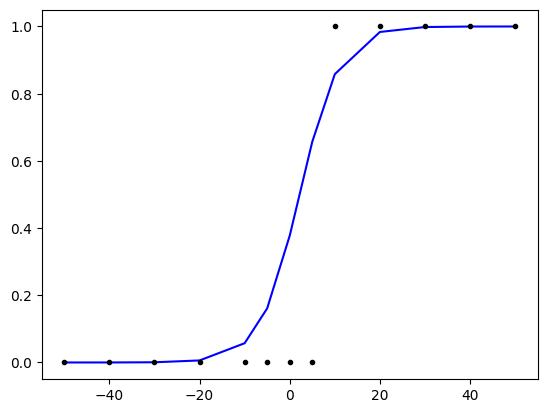

In [10]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [11]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

1/1 [==============================] - 0s 30ms/step
[[0.43278423]
 [0.4898806 ]
 [0.5472422 ]
 [0.603376  ]
 [0.6305461 ]]
1/1 [==============================] - 0s 18ms/step
[[0.88387764]
 [0.9870016 ]
 [0.9986816 ]
 [0.9998677 ]
 [1.        ]]
